In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("tracks.csv")
df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


Lets check whether the number of artists and id_artists coincides.

In [3]:
import ast
def get_list_from_str(string):
    return ast.literal_eval(string)

In [4]:
print(get_list_from_str(df['artists'].iloc[586670]))

['Gentle Bones', 'Clara Benin']


In [5]:
artists_number_1=df['artists'].apply(lambda x: len(get_list_from_str(x)))
artists_number_2=df['id_artists'].apply(lambda x: len(get_list_from_str(x)))

In [6]:
(artists_number_1==artists_number_2).all()

True

Yes, it coincides

Let's get dates from release_date to datetime format to extract the year, month and day separately

In [7]:
df['release_date'].iloc[:5]

0    1922-02-22
1    1922-06-01
2    1922-03-21
3    1922-03-21
4          1922
Name: release_date, dtype: object

In [40]:
dates=pd.to_datetime(df['release_date'])

In [41]:
dates.iloc[-10:]

586662   2020-12-20
586663   2020-12-29
586664   2020-03-03
586665   2020-03-20
586666   2020-02-08
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, dtype: datetime64[ns]

In [44]:
dates.iloc[0].year

1922

Find songs by artists

In [64]:
df_len=len(df)

In [70]:
get_list_from_str(df['artists'].iloc[586670])

['Gentle Bones', 'Clara Benin']

In [111]:
def artist_found(pd_elem, artists):
    return sum([art in pd_elem for art in artists])>0

In [174]:
artist_found("['Gentle Bones', 'Clara Benin']", ['Clara Benine','Gentle Bone'])

True

In [123]:
def find_by_some_artists(artists):
    return df[[artist_found(df['artists'].iloc[i], artists) for i in range(df_len)]]

In [175]:
find_by_some_artists(['Clara Benin', '阿YueYue'])

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,decades
575443,04ldhfKQYUZKBCg1TcdoAU,Closure,36,222109,0,['Clara Benin'],['5ebPSE9YI5aLeZ1Z2gkqjn'],2014,0.572,0.2820,...,1,0.0380,0.8360,0.000000,0.1150,0.380,76.485,4,2014,2010
575452,74gmYHHKVjnah9FCVOi4Mg,Tila,47,185875,0,['Clara Benin'],['5ebPSE9YI5aLeZ1Z2gkqjn'],2015-11-23,0.513,0.0640,...,1,0.0332,0.9610,0.000880,0.0996,0.314,139.893,4,2015,2010
575572,1d5BAYXRfjUfv8rqYkoxs1,Right Time,45,316133,0,"['Johnoy Danao', 'Clara Benin']","['2zFBNsALb4M2FhKl98wcvd', '5ebPSE9YI5aLeZ1Z2g...",2016-09-23,0.639,0.2330,...,1,0.0302,0.9120,0.000034,0.1110,0.368,101.119,4,2016,2010
575663,3Qa2JS1RJGQFyIu1qmALjw,Fallin',48,250813,0,"['December Avenue', 'Clara Benin']","['4qFxP3qN9GsnZDOkAE6x2m', '5ebPSE9YI5aLeZ1Z2g...",2017-03-20,0.312,0.7850,...,0,0.0317,0.0378,0.000000,0.3500,0.438,83.564,4,2017,2010
575935,4cV4NoR8nFD6HPJij91NsF,Parallel Universe,49,264000,0,['Clara Benin'],['5ebPSE9YI5aLeZ1Z2gkqjn'],2019-10-01,0.538,0.0251,...,1,0.0374,0.5750,0.000015,0.1100,0.195,134.440,3,2019,2010
575958,2jHHaNZrgt506zDAKlhQr3,Solomon,48,378000,0,"['Munimuni', 'Clara Benin']","['4eKq7eArL96wSQjaaMg9Ic', '5ebPSE9YI5aLeZ1Z2g...",2019-07-26,0.407,0.1970,...,1,0.0269,0.7440,0.003010,0.1010,0.114,71.021,4,2019,2010
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,0,0.0292,0.7850,0.000000,0.0648,0.211,131.896,4,2020,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,1,0.0345,0.2060,0.000003,0.3050,0.438,90.029,4,2021,2020


Find dependence between popularity and year, and most occuring years of songs.

In [127]:
df['release_year']=dates.apply(lambda x: x.year)

In [130]:
df.release_year.iloc[-10:]

586662    2020
586663    2020
586664    2020
586665    2020
586666    2020
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Name: release_year, dtype: int64

<AxesSubplot:>

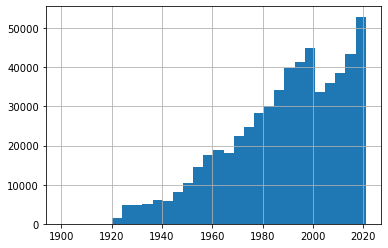

In [139]:
df.release_year.hist(bins=30)

In [141]:
df.release_year.value_counts()

2020    13937
1998    12485
1999    12484
1997    12349
1996    12058
        ...  
1925      903
1923      657
1924      633
1922      294
1900        1
Name: release_year, Length: 101, dtype: int64

Most of the songs are from 2020, 1998 and 1999 (maybe 90s). Is it true this fact represents the popularity of songs of these years? Or is it just choosen data with most of samples with these years?

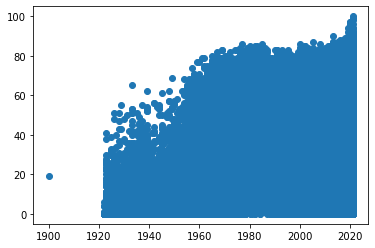

In [142]:
plt.scatter(df.release_year, df.popularity)

In [144]:
df[['release_year', 'popularity']].corr()

,release_year,popularity
release_year,1.000000,0.590921
popularity,0.590921,1.000000


We see correlation=0.59. Seems year affects popularity of a song.

In [165]:
df['decades']=df['release_year'].apply(lambda x: x//100*100+x%100//10*10)

In [166]:
df.decades[-10:]

586662    2020
586663    2020
586664    2020
586665    2020
586666    2020
586667    2020
586668    2020
586669    2020
586670    2020
586671    2010
Name: decades, dtype: int64

/Users/user/miniconda3/envs/dataMineVenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


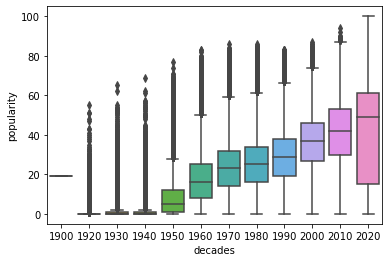

In [171]:
sns.boxplot(df.decades, df.popularity)
plt.show()

In general popularity of a song grows with respect to year. Therefore previous assumption seems to be wrong. In other words in our data there is a lot of unpopular 90s music.

In [172]:
df.explicit.value_counts()

0    560808
1     25864
Name: explicit, dtype: int64